In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns;
import scipy
import os

from data_utils import *
from plot_utils import *

matplotlib.rcParams['figure.dpi']= 200

colors = sns.color_palette("hls", n_colors=11)

In [2]:
d_ascend910_rnn = get_data('ascend910_rnn')

print(f"ascend910 total data points:  {len(d_ascend910_rnn['labels'])}")
d_ascend910_rnn_flops = np.array(d_ascend910_rnn['flops'])
indices = np.where(d_ascend910_rnn_flops > 0.0)
d_ascend910_rnn_flops = d_ascend910_rnn_flops[indices]
print(f"ascend910 flops that > 0: {d_ascend910_rnn_flops.size}")

ascend910 total data points:  108
ascend910 flops that > 0: 92


In [4]:
d_v100_rnn = get_data('v100_rnn')
v100_peak_flops = 125e12

print(f"v100 total data points:  {len(d_v100_rnn['labels'])}")
d_v100_rnn_flops = np.array(d_v100_rnn['flops'])
indices = np.where(d_v100_rnn_flops > 0.0)
d_v100_rnn_flops = d_v100_rnn_flops[indices]
print(f"v100 flops that > 0: {d_v100_rnn_flops.size}")

v100 total data points:  108
v100 flops that > 0: 108


### LR weights

['bs', '64']
['seqlen', '512']
['embedingsize', '8192']
['hiddensize', '8192']
check x y [-1.02575529  1.33630621  1.38873015  1.38873015] -0.6554525680256932


/home/u20200002/.conda/envs/torch1.5/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


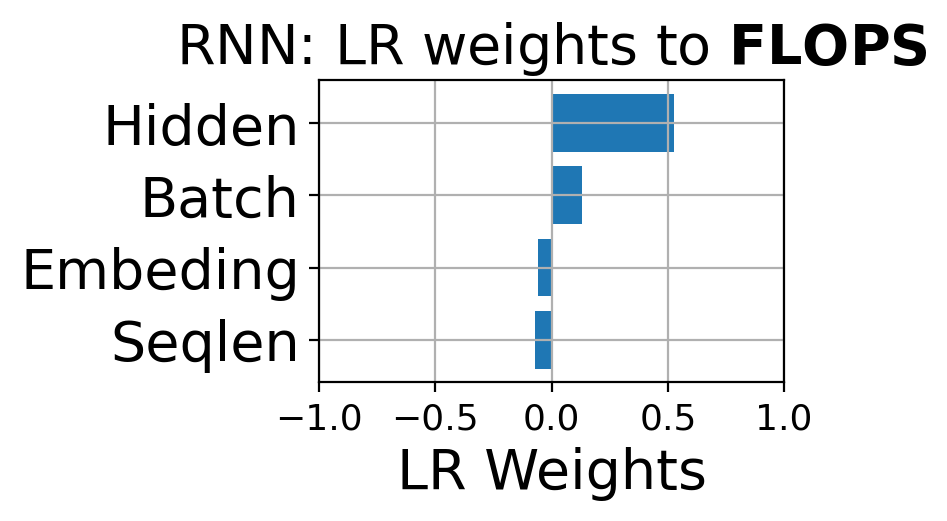

In [5]:
from ml_utils import *
f = regression(d_ascend910_rnn['labels'], d_ascend910_rnn['flops'],
               title = r'RNN: LR weights to $\bf{FLOPS}$')

length of speedups 92
max speedup: 1.2387612842190645 label: bs_512-seqlen_128-embedingsize_512-hiddensize_8192
min speedup: 0.011576818455587641 label: bs_64-seqlen_128-embedingsize_512-hiddensize_512
bs [64, 128, 256, 512]
seqlen [128, 256, 512]
embedingsize [512, 2048, 8192]
hiddensize [512, 2048, 8192]
-----------------------


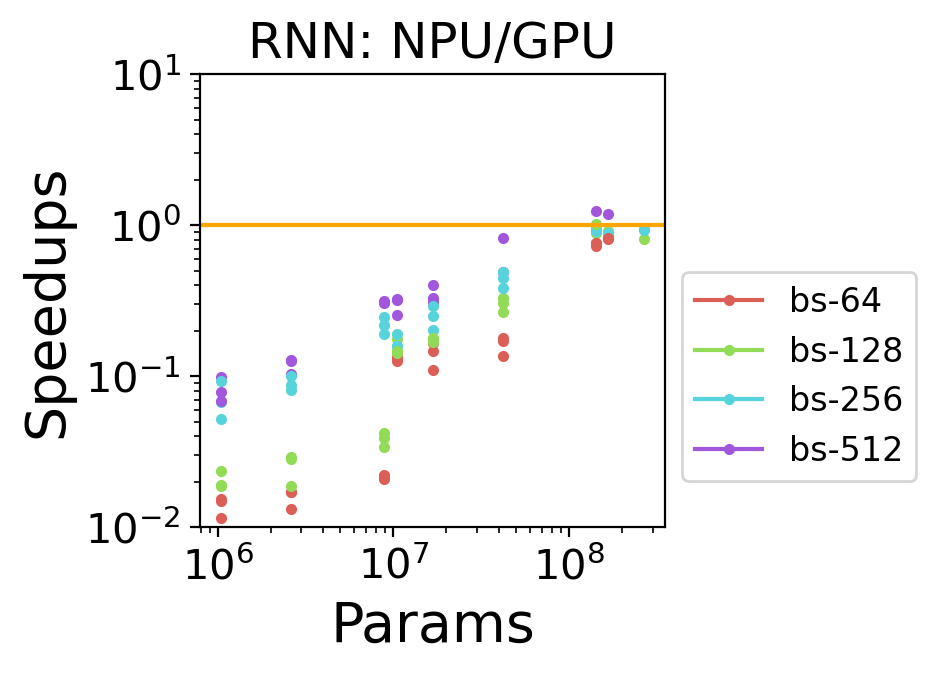

In [10]:
from plot_utils import *
f = speedup_params(d_ascend910_rnn['labels'], d_ascend910_rnn['example_per_sec'], 
               d_v100_rnn['labels'], d_v100_rnn['example_per_sec'], d_v100_rnn['params'],  marker='.', lim=[0.01, 10],
                   legend_box=(1,0.6),
               color='bs', title= 'RNN: NPU/GPU')